<a href="https://colab.research.google.com/github/00hamza00/CE888-Data-Science-and-Decision-Making/blob/master/Lab_7/Lab7_Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import layers
from keras import models

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [17]:
# Changed optimizer from rmsprop to adam.
# Changed also the number of epochs from 5 to 3 (since in the original experiment, the max validation accuracy was achieved at 3 epochs).
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 98us/step - loss: 0.0343 - acc: 0.9889 - val_loss: 0.0454 - val_acc: 0.9874
Epoch 2/10
48000/48000 [==============================] - 4s 88us/step - loss: 0.0252 - acc: 0.9921 - val_loss: 0.0334 - val_acc: 0.9902
Epoch 3/10
48000/48000 [==============================] - 4s 86us/step - loss: 0.0191 - acc: 0.9935 - val_loss: 0.0390 - val_acc: 0.9895
Epoch 4/10
48000/48000 [==============================] - 4s 87us/step - loss: 0.0146 - acc: 0.9953 - val_loss: 0.0367 - val_acc: 0.9908
Epoch 5/10
48000/48000 [==============================] - 4s 87us/step - loss: 0.0138 - acc: 0.9949 - val_loss: 0.0378 - val_acc: 0.9906
Epoch 6/10
48000/48000 [==============================] - 4s 88us/step - loss: 0.0114 - acc: 0.9961 - val_loss: 0.0370 - val_acc: 0.9908
Epoch 7/10
48000/48000 [==============================] - 4s 88us/step - loss: 0.0078 - acc: 0.9975 - val_loss: 0.0384 - val_acc

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 1s 51us/step


0.9904

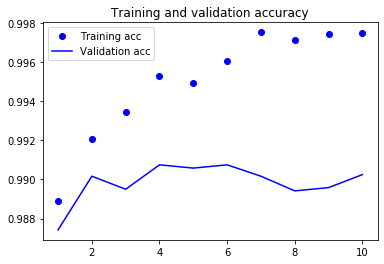

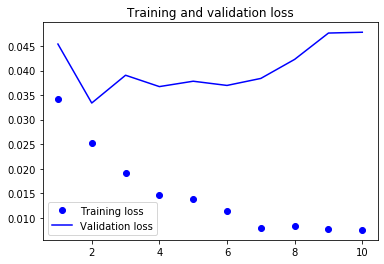

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()